# Historical Donor Data Analysis 

Where had this nonprofit's fundraising programming has gone well, and where there was room for improvement.  

**Who**
All individual donors who gave to the c3 recorded in NGP, minus monthly donors. We have  
We’re working with 7,392 donors in this analysis.

**Approach**
This is what I would call an “exploratory data analysis.” My goal here was to simply understand or donor data and start asking questions. Like every good analysis, I wound up with more questions than I was able to answer.   

**I started my analysis by asking the questions:**  
How many of our donors give below \\$100? Below \\$500? Below \\$1,000?  
What’s the average lifetime value of our donors?  
How many of our donors give once and then never again?  
Who loves us the most (donors with the most gifts)?  


In [1]:
# load the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
# read in the data for the c4 and the c3
c3 = pd.read_csv("data/all_c3_donors.Csv")
c4 = pd.read_csv("data/all_c4_donors.csv")

# c3 Donors
## The Data

In [27]:
# Let's make the donors anonymous 
c3_small = c3.iloc[:,[2,3,11]]
c3_small.columns = ['date', 'amount', 'name']
c3_small["name"] = c3_small["name"].astype('category').cat.codes
c3_small.head(10)

/home/thebbennett/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,amount,name
0,06/15/2013,25.0,1900
1,07/08/2011,2000.0,4112
2,09/03/2013,25.0,4182
3,10/11/2013,100.0,1966
4,09/03/2013,25.0,1973
5,09/03/2013,10.0,2004
6,09/13/2013,1.0,2028
7,05/15/2014,10.0,2145
8,08/26/2014,10.0,2145
9,09/02/2013,5.0,4367


In [29]:
# What are the lifetime amounts of our top donors?
donors_by_lifetime = c3_small.groupby(['name'])['amount'].sum().sort_values(ascending = False).to_frame()
donors_by_lifetime.columns = ['lifetime_amount']
donors_by_lifetime.head(15)

,lifetime_amount
name,
4421,301000.0
673,50000.0
5780,50000.0
6974,35500.0
813,35000.0
6980,35000.0
3537,30555.0
1456,26100.0
6093,25000.0


## Distribution of lifetime amount  1 to 100

In [30]:
sub_100 = donors_by_lifetime.loc[donors_by_lifetime["lifetime_amount"] <= 100]

/home/thebbennett/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


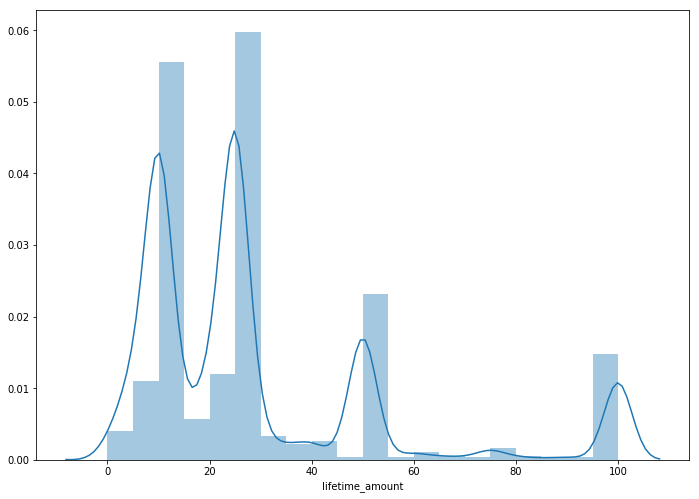

In [31]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(sub_100['lifetime_amount'], bins = 20)

## Removing the One Time Kickstarter Folk

25% of our donors have a lifetime amount of $25. We know that this nonprofit had a one-time global kickstarter campaign that racked up tons of one-time small-dollar gifts. We should absolutely filter these folk out of our analysis.  

Let's find the source code that corresponds to these folk.

In [86]:
donors_by_lifetime.loc[donors_by_lifetime["lifetime_amount"] == 25].count()/len(donors_by_lifetime)

lifetime_amount    0.255166
dtype: float64

In [99]:
c3_clean = c3
c3_clean[" Contact Name"] = c3_clean[" Contact Name"].astype('category').cat.codes
c3_clean = c3_clean.set_index(" Contact Name")


In [100]:
c3_clean["Received On"] = pd.to_datetime(c3_clean["Received On"])
c3_clean.head()

,Count,Contribution ID,Received On,Amount,Designation,Contribution Type,Cycle,Period,Contribution.Note,Source Code Path,Contact ID
Contact Name,,,,,,,,,,,
1903,NaN,VNW16CXS6W4,2013-06-15,25.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGHM673
4115,NaN,VNW16CGKCY8,2011-07-08,2000.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGHGYZ0
4185,NaN,VNW16CGENE0,2013-09-03,25.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGH1BC4
1969,NaN,VNW16CGJP70,2013-10-11,100.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGHVH14
1976,NaN,VNW16CGBAE5,2013-09-03,25.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGGZJ57


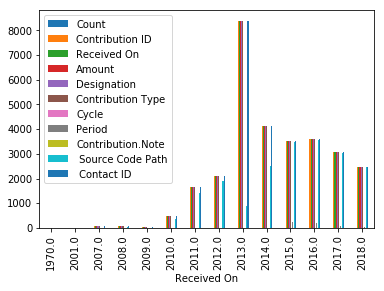

In [101]:
c3_clean.groupby(c3_clean["Received On"].dt.year).count().plot(kind="bar")


In [102]:
import datetime
datetime.datetime.strptime


<function datetime.strptime>

In [106]:
c3_clean = c3_clean[c3_clean['Received On'].apply(lambda x: x.year == 2013)]
c3_clean.head()

,Count,Contribution ID,Received On,Amount,Designation,Contribution Type,Cycle,Period,Contribution.Note,Source Code Path,Contact ID
Contact Name,,,,,,,,,,,
1903,NaN,VNW16CXS6W4,2013-06-15,25.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGHM673
4185,NaN,VNW16CGENE0,2013-09-03,25.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGH1BC4
1969,NaN,VNW16CGJP70,2013-10-11,100.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGHVH14
1976,NaN,VNW16CGBAE5,2013-09-03,25.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGGZJ57
2007,NaN,VNW16CGB8W0,2013-09-03,10.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGH0TA2


Bingo. The crowdfunding campaign occured in September of 2013.

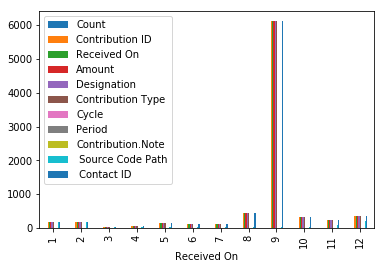

In [110]:
c3_clean.groupby(c3_clean["Received On"].dt.month).count().plot(kind="bar")


In [159]:
donors_100_1000 = donors_by_lifetime.loc[(donors_by_lifetime["lifetime_amount"] > 100) & (donors_by_lifetime["lifetime_amount"] <= 1000)]

/home/thebbennett/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


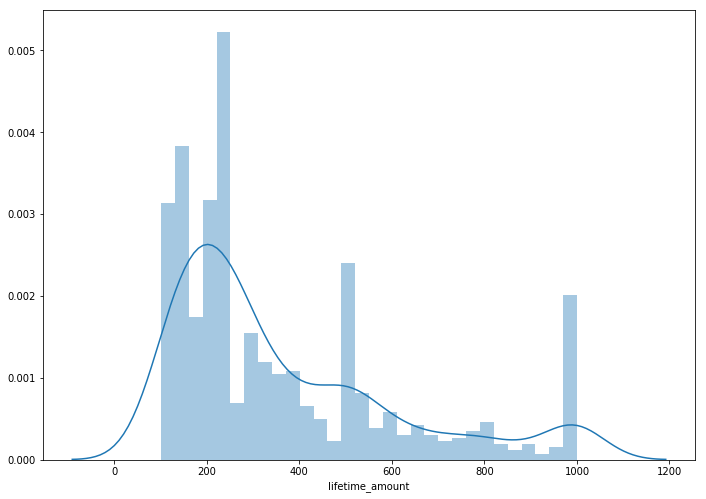

In [271]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

sns.distplot(donors_100_1000['lifetime_amount'], bins = 30)

In [164]:
donors_1000_10000 = donors_by_lifetime.loc[(donors_by_lifetime["lifetime_amount"] > 1000) & (donors_by_lifetime["lifetime_amount"] <= 10000)]

/home/thebbennett/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


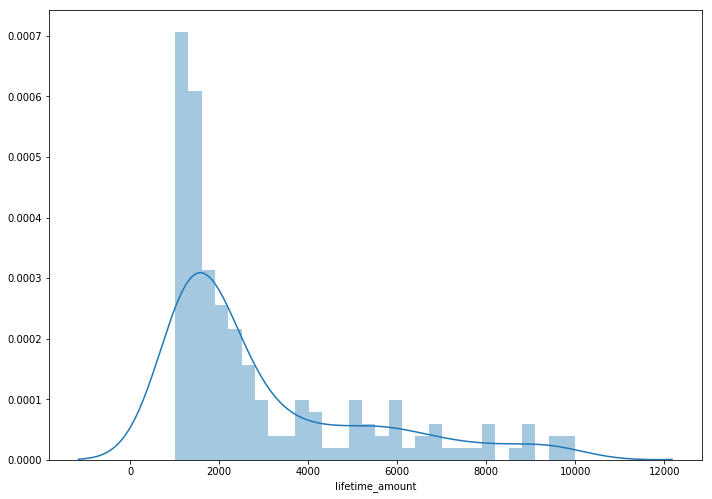

In [272]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

sns.distplot(donors_1000_10000['lifetime_amount'], bins = 30)

## Distribution of lifetime amounts of 900 to 1,500 
As we can see, we have a large number of donors with a lifetime amount of $1,000... why aren't they giving more past this amount?

In [282]:
donors_900_1500 = donors_by_lifetime.loc[(donors_by_lifetime["lifetime_amount"] > 900) & (donors_by_lifetime["lifetime_amount"] <= 10000)]

/home/thebbennett/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


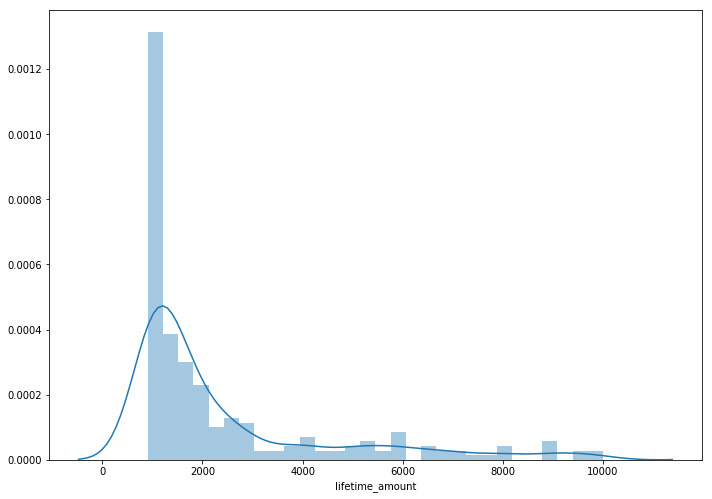

In [283]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(donors_900_1500['lifetime_amount'], bins = 30)

In [295]:
donors_by_lifetime.loc[(donors_by_lifetime["lifetime_amount"] == 1000)].count()

lifetime_amount    46
dtype: int64

In [294]:
donors_by_lifetime.loc[(donors_by_lifetime["lifetime_amount"] == 1000)].count()/243

lifetime_amount    0.1893
dtype: float64

In [293]:
donors_by_lifetime.loc[(donors_by_lifetime["lifetime_amount"] >= 1000)].count()

lifetime_amount    243
dtype: int64

## Small Dollar Donors

In [172]:
donors_by_lifetime.loc[donors_by_lifetime["lifetime_amount"] <= 500].count()

lifetime_amount    7262
dtype: int64

In [173]:
len(donors_by_lifetime)

7645

In [177]:
7262/len(donors_by_lifetime)

0.9499018966644865

95% of New Era Colorado's donors have a lifetime value of \$500 or below.

In [175]:
donors_by_lifetime.loc[donors_by_lifetime["lifetime_amount"] <= 100].count()

lifetime_amount    6586
dtype: int64

In [176]:
6586/len(donors_by_lifetime)

0.8614780902550687

86% of New Era Colorado's donors had a lifeitme value of below \$100!  

This leads to the question: how many donors only give once? and what is the spread of those one-time gifts?

In [296]:
donors_by_lifetime.loc[donors_by_lifetime["lifetime_amount"] <= 500].sum()

lifetime_amount    361941.62
dtype: float64

In [298]:
donors_by_lifetime.loc[donors_by_lifetime["lifetime_amount"] <= 500].sum()/donors_by_lifetime.sum()

lifetime_amount    0.193997
dtype: float64

## Removing monthly donors

In [212]:
c3.head()

,Count,Contribution ID,Received On,Amount,Designation,Contribution Type,Cycle,Period,Contribution.Note,Source Code Path,Contact ID,Contact Name
0,NaN,VNW16CXS6W4,06/15/2013,25.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGHM673,Debra Johnson
1,NaN,VNW16CGKCY8,07/08/2011,2000.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGHGYZ0,Ken Gordon
2,NaN,VNW16CGENE0,09/03/2013,25.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGH1BC4,Kim Chinn
3,NaN,VNW16CGJP70,10/11/2013,100.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGHVH14,Diana Miller
4,NaN,VNW16CGBAE5,09/03/2013,25.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGGZJ57,Diane Driver


In [214]:
c3_code = c3.iloc[:,[2,3,9,11]]
c3_code.tail()

,Received On,Amount,Source Code Path,Contact Name
29609,10/15/2018,20.0,c3 Donors/Player contribution/COGDmonthly dona...,Susan Peterson
29610,05/08/2018,10.0,c3 Donors/Player contribution/COGDmonthly dona...,Robert Shurr
29611,07/13/2018,20.0,c3 Donors/Player contribution/COGDmonthly dona...,Susan Peterson
29612,07/08/2018,10.0,c3 Donors/Player contribution/COGDmonthly dona...,Robert Shurr
29613,NaN,NaN,NaN,NaN


In [218]:
c3_code.columns = ['date', 'amount', 'code', 'name']
c3_code.head()

,date,amount,code,name
0,06/15/2013,25.0,NaN,Debra Johnson
1,07/08/2011,2000.0,NaN,Ken Gordon
2,09/03/2013,25.0,NaN,Kim Chinn
3,10/11/2013,100.0,NaN,Diana Miller
4,09/03/2013,25.0,NaN,Diane Driver


In [222]:
monthly_gifts = c3_code[c3_code['code'].str.contains("Player") == True]
monthly_gifts.head()

,date,amount,code,name
15137,04/22/2015,50.0,c3 Donors/Player contribution,Joellen Raderstorf
15138,09/15/2015,50.0,c3 Donors/Player contribution,Joellen Raderstorf
15139,08/15/2016,50.0,c3 Donors/Player contribution,Joellen Raderstorf
15140,08/15/2016,5.0,c3 Donors/Player contribution,Jessie Fischer
15141,11/15/2015,5.0,c3 Donors/Player contribution,Kate Billman-Golemme


In [284]:
no_monthly = pd.concat([c3_code, monthly_gifts]).drop_duplicates(keep=False)
no_monthly.head(10)

,date,amount,code,name
0,06/15/2013,25.0,NaN,Debra Johnson
1,07/08/2011,2000.0,NaN,Ken Gordon
2,09/03/2013,25.0,NaN,Kim Chinn
3,10/11/2013,100.0,NaN,Diana Miller
4,09/03/2013,25.0,NaN,Diane Driver
5,09/03/2013,10.0,NaN,Donald Ray
6,09/13/2013,1.0,NaN,Doran Mauldinll
7,05/15/2014,10.0,NaN,Elise Jones
8,08/26/2014,10.0,NaN,Elise Jones
9,09/02/2013,5.0,NaN,Laura Reichardt


# Repeating the analysis, minus monthly members
## By Gift Count

In [227]:
no_monthly_by_gifts = no_monthly.groupby(['name']).size().sort_values(ascending = False).to_frame()
no_monthly_by_gifts.columns = ['number_of_gifts']
no_monthly_by_gifts.head(15)

,number_of_gifts
name,
David Winter,77
Susan Peterson,74
Jason Machado,69
Name Unknown,69
Bob Morehouse,64
Daniel Gonzales,57
Jill Grano,56
John and Maggie Fieldsteel,54
Kristen Painter,54


## By Lifetime Value

In [228]:
no_monthly_by_lifetime = no_monthly.groupby(['name'])['amount'].sum().sort_values(ascending = False).to_frame()
no_monthly_by_lifetime.columns = ['lifetime_amount']
no_monthly_by_lifetime.head(15)

,lifetime_amount
name,
Laurie Michaels,301000.0
Pat Stryker,50000.0
Becky and Dean Leffingwell,50000.0
Strategies 360 No Data,35500.0
Sue Anderson,35000.0
Brad Armstrong,35000.0
John Powers,30555.0
Colorado Education Association,26100.0
Peter Sargent,25000.0


We have **7,392 non monthly donors**.  
The average lifetime value of our donors is \$244.   
The highest gift we ever received was for \$300,000!  
**75% of donors have a lifetime value of \$50 or below.**

In [229]:
no_monthly_by_lifetime.describe()

,lifetime_amount
count,7392.000000
mean,220.286945
std,3804.712180
min,1.000000
25%,10.000000
50%,25.000000
75%,50.000000
max,301000.000000


In [285]:
no_monthly_by_lifetime.median()

lifetime_amount    25.0
dtype: float64

## Repeat Donors (non monthly)

In [231]:
no_monthly_by_gifts.loc[donors_by_gifts['number_of_gifts'] == 1].count()

number_of_gifts    6403
dtype: int64

In [232]:
no_monthly_by_gifts.loc[donors_by_gifts['number_of_gifts'] == 1].count()/len(donors_by_gifts)

number_of_gifts    0.837541
dtype: float64

83% of New Era's donors only give once!

In [233]:
repeat_donors = no_monthly_by_gifts.loc[no_monthly_by_gifts['number_of_gifts'] != 1]

In [286]:
repeat_donors.head(10)

,number_of_gifts
name,
David Winter,77
Susan Peterson,74
Jason Machado,69
Name Unknown,69
Bob Morehouse,64
Daniel Gonzales,57
Jill Grano,56
John and Maggie Fieldsteel,54
Kristen Painter,54


/home/thebbennett/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


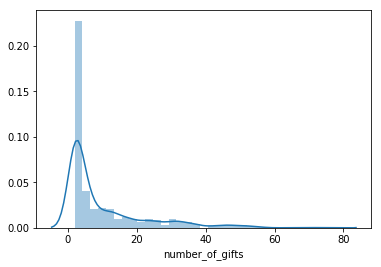

In [235]:
sns.distplot(repeat_donors['number_of_gifts'])

In [236]:
repeat_donors_zoom = donors_by_gifts.loc[(donors_by_gifts['number_of_gifts'] > 1) & (donors_by_gifts['number_of_gifts'] < 50)]

/home/thebbennett/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


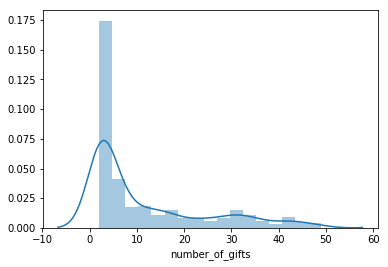

In [237]:
sns.distplot(repeat_donors_zoom['number_of_gifts'])

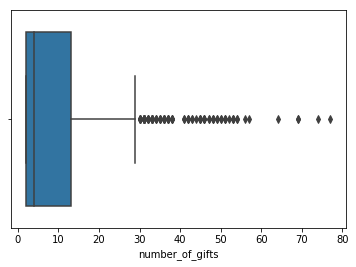

In [238]:
ax = sns.boxplot(x=repeat_donors["number_of_gifts"])

In [239]:
repeat_donors.describe()

,number_of_gifts
count,901.000000
mean,10.354051
std,12.726702
min,2.000000
25%,2.000000
50%,4.000000
75%,13.000000
max,77.000000


In [287]:
repeat_donors.median()

number_of_gifts    4.0
dtype: float64

New Era has 901 donors that have given more than 1 gift (compared to 6,403 that have only given once!). The average number of repeat gifts is 10, with 75% of the data falling between 2 and 13 gifts. 

About a third (35%) of our repeat donors only give twice, however. 50% of our repeat donors give 4 or less gifts. 

In [243]:
no_monthly_by_gifts.loc[no_monthly_by_gifts['number_of_gifts'] == 2].count()/901

number_of_gifts    0.352941
dtype: float64

In [249]:
no_monthly_by_gifts.loc[(no_monthly_by_gifts['number_of_gifts'] < 5) & (no_monthly_by_gifts['number_of_gifts'] > 1)].count()/901

number_of_gifts    0.517203
dtype: float64